# Research Question No. 2

## How frequent are long-lived bugs in FLOSS project?

## Experimental parameters


| Project                    |         #Reports     |       #Thesholds     |
|----------------------------|:--------------------:|:--------------------:|
| Eclipse                    |        9998         |         365          |
| GCC                        |        9998         |         365          |
| Gnome                      |        7991          |         365          |
| Freedesktop                |        7712          |         365          |
| Mozilla                    |        9998          |         365          |
| WineHQ                     |        6073          |         365          |

Every bug which its report have indicated that the number of days to resolve is less than or equal to **threshold fixed** was considered a **non-long lived bug** and that which the number of days to resolve is greater than this threshold was considered as a **long-live bug**. 

## Step1. Setup environment.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt 
import nltk 
import numpy as np
import os 
import pandas as pd
import seaborn as sns 
import string

from nltk.stem   import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Setup Seaborn
sns.set_context("paper")
sns.set(style="ticks", color_codes=True, font_scale=2)

# Setup Matplotlib
plt.rc('figure', figsize=(20, 20))
plt.style.use('default')
SMALL_SIZE  = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font',   size=SMALL_SIZE)       # controls default text sizes
plt.rc('axes',   titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes',   labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc('xtick',  labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick',  labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)   # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#%matplotlib inline 

# Setup NLTK
stemmer = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')

# Path of the file to read.
projects = ['eclipse', 'freedesktop', 'gnome', 'mozilla', 'gcc', 'winehq']

# Fixed time threshold.
bug_fix_time_threshold = 365
print("Setup complete")

[nltk_data] Downloading package punkt to /home/gomes/nltk_data...


Setup complete


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gomes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2. Load data.

In [3]:
bug_reports_data_list = []
for project in projects:
    bug_reports_path = f"datasets/20190917_{project}_bug_report_data.csv"

    # read bug reports data.
    bug_reports_data = pd.read_csv(bug_reports_path)[0:10000]
    rows_and_cols = bug_reports_data.shape
    print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {bug_reports_path}.\n")
    print(f"Mean of bug fix time: {bug_reports_data['bug_fix_time'].mean(axis=0)}.\n")
   
    bug_reports_data["project"] = project  
    bug_reports_data_list.append(bug_reports_data) 

# concatenate all bug_reports_data 
bug_reports_all_data = pd.concat(bug_reports_data_list)

There are 10000 rows and 19 columns in datasets/20190917_eclipse_bug_report_data.csv.

Mean of bug fix time: 108.5303.

There are 7714 rows and 19 columns in datasets/20190917_freedesktop_bug_report_data.csv.

Mean of bug fix time: 173.19665543168264.

There are 7993 rows and 19 columns in datasets/20190917_gnome_bug_report_data.csv.

Mean of bug fix time: 202.4147378956587.

There are 10000 rows and 19 columns in datasets/20190917_mozilla_bug_report_data.csv.

Mean of bug fix time: 278.071.

There are 10000 rows and 19 columns in datasets/20190917_gcc_bug_report_data.csv.

Mean of bug fix time: 337.8563.

There are 6074 rows and 19 columns in datasets/20190917_winehq_bug_report_data.csv.

Mean of bug fix time: 491.10273296015805.



In [4]:
bug_reports_history_data_list = []
for project in projects:
    bug_reports_history_path = f"datasets/20190917_{project}_bug_report_history_data.csv"

    # read bug reports data.
    bug_reports_history_data = pd.read_csv(bug_reports_history_path, sep=',')
 
    # print dataframe information
    rows_and_cols = bug_reports_history_data.shape
    print(f"There are {rows_and_cols[0]} rows and {rows_and_cols[1]} columns in {bug_reports_history_path}.\n")
    
    bug_reports_history_data_list.append(bug_reports_history_data) 

# concatenate all bug_reports_data 
bug_reports_all_history_data = pd.concat(bug_reports_history_data_list)

There are 79279 rows and 6 columns in datasets/20190917_eclipse_bug_report_history_data.csv.

There are 51724 rows and 6 columns in datasets/20190917_freedesktop_bug_report_history_data.csv.

There are 52102 rows and 6 columns in datasets/20190917_gnome_bug_report_history_data.csv.

There are 191270 rows and 6 columns in datasets/20190917_mozilla_bug_report_history_data.csv.

There are 98055 rows and 6 columns in datasets/20190917_gcc_bug_report_history_data.csv.

There are 60992 rows and 6 columns in datasets/20190917_winehq_bug_report_history_data.csv.



## Step 3. Review the data

In [5]:
bug_reports_all_data.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,project
0,EMF-354412,2011-08-10,cdo.core,EMF,containsAll returns wrong result in case of de...,Cloned from: 354395: containsAll returns wrong...,stepper,stepper,fixed,1,closed,6,2012-09-21,0,5,2011-08-10,0,normal,2,eclipse
1,JSDT-253166,2008-11-03,General,JSDT,Javascript validation has several errors with ...,Some of our javascript-files yield parse-error...,cmjaun,acm,fixed,1,resolved,4,2010-03-03,0,6,2009-04-29,177,normal,2,eclipse
2,ECLIPSELINK-338573,2011-03-01,SDO,ECLIPSELINK,Memory Improvement: Reduce the instances of S...,Currently the SDO/OXM metadata is referring to...,blaise.doughan,blaise.doughan,fixed,1,resolved,4,2011-03-02,0,5,2011-03-02,1,normal,2,eclipse
3,BIRT-150200,2006-07-10,Chart,BIRT,Stacked Area Chart: fill.set() ignored in befo...,In the attached report the fill.set() is being...,nli,eclipse,fixed,1,resolved,4,2010-03-24,0,7,2006-08-29,50,major,4,eclipse
4,PAPYRUS-384964,2012-07-12,Core,PAPYRUS,[StateMachine Diagram] Papyrus does not forbid...,In some situation (seem to be when an element ...,ansgar.radermacher,yann.tanguy,fixed,1,resolved,4,2013-04-02,0,3,2013-04-02,264,critical,5,eclipse


In [6]:
bug_reports_all_data.describe()

,resolution_code,status_code,quantity_of_votes,quantity_of_comments,bug_fix_time,severity_code
count,51781.0,51781.000000,51781.000000,51781.000000,51781.000000,51781.000000
mean,1.0,4.409957,0.078832,8.664896,254.561982,2.355710
std,0.0,0.807380,1.303383,12.267116,542.361709,0.987261
min,1.0,4.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.0,4.000000,0.000000,3.000000,3.000000,2.000000
50%,1.0,4.000000,0.000000,6.000000,29.000000,2.000000
75%,1.0,4.000000,0.000000,10.000000,235.000000,2.000000
max,1.0,6.000000,101.000000,810.000000,7294.000000,6.000000


In [7]:
bug_reports_all_data.drop(bug_reports_all_data.loc[bug_reports_all_data['bug_fix_time'] < 0].index, inplace=True)
bug_reports_all_data.loc[bug_reports_all_data['bug_fix_time'] < 0]

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,project


In [8]:
bug_reports_all_history_data.head()

,Key,Who,When,What,Removed,Added
0,EMF-354412,stepper,2011-08-10,status,new,assigned
1,EMF-354412,stepper,2011-08-10,assignee,emf.cdo-inbox,stepper
2,EMF-354412,stepper,2011-08-10,status,assigned,resolved
3,EMF-354412,stepper,2011-08-10,resolution,---,fixed
4,EMF-354412,stepper,2012-09-21,status,resolved,closed


## Step 4. Pre-processing the data

In [9]:
bug_reports_all_data['short_description'] = bug_reports_all_data['short_description'].fillna("")
bug_reports_all_data['long_description']  = bug_reports_all_data['long_description'].fillna("")
bug_reports_all_data['short_description_words'] = bug_reports_all_data['short_description'].str.split().apply(lambda l: len(l))
bug_reports_all_data['long_description_words']  = bug_reports_all_data['long_description'].str.split().apply(lambda l: len(l))
bug_reports_all_data['long_lived?']  = bug_reports_all_data['bug_fix_time'].apply(lambda t: 'long-lived' if t > bug_fix_time_threshold else 'short-lived')

bug_reports_all_data.drop(bug_reports_all_data[bug_reports_all_data['severity_category'] == 'not set'].index, inplace=True)
bug_reports_all_data.drop(bug_reports_all_data[bug_reports_all_data['bug_fix_time'] < 0 ].index, inplace=True)

bug_reports_all_data.head()

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,...,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code,project,short_description_words,long_description_words,long_lived?
0,EMF-354412,2011-08-10,cdo.core,EMF,containsAll returns wrong result in case of de...,Cloned from: 354395: containsAll returns wrong...,stepper,stepper,fixed,1,...,0,5,2011-08-10,0,normal,2,eclipse,9,134,short-lived
1,JSDT-253166,2008-11-03,General,JSDT,Javascript validation has several errors with ...,Some of our javascript-files yield parse-error...,cmjaun,acm,fixed,1,...,0,6,2009-04-29,177,normal,2,eclipse,8,179,short-lived
2,ECLIPSELINK-338573,2011-03-01,SDO,ECLIPSELINK,Memory Improvement: Reduce the instances of S...,Currently the SDO/OXM metadata is referring to...,blaise.doughan,blaise.doughan,fixed,1,...,0,5,2011-03-02,1,normal,2,eclipse,7,23,short-lived
3,BIRT-150200,2006-07-10,Chart,BIRT,Stacked Area Chart: fill.set() ignored in befo...,In the attached report the fill.set() is being...,nli,eclipse,fixed,1,...,0,7,2006-08-29,50,major,4,eclipse,7,29,short-lived
4,PAPYRUS-384964,2012-07-12,Core,PAPYRUS,[StateMachine Diagram] Papyrus does not forbid...,In some situation (seem to be when an element ...,ansgar.radermacher,yann.tanguy,fixed,1,...,0,3,2013-04-02,264,critical,5,eclipse,14,73,short-lived


In [10]:
bug_reports_all_data['project'].value_counts()

eclipse        9998
gcc            9998
mozilla        9998
gnome          7991
freedesktop    7712
winehq         6073
Name: project, dtype: int64

In [11]:
bug_reports_all_data.groupby('project').agg({'creation_date':[np.min, np.max]})

creation_date            
                     amin        amax
project                              
eclipse        2001-10-10  2018-01-30
freedesktop    2003-02-05  2019-08-15
gcc            1999-08-26  2018-01-31
gnome          1999-01-02  2018-01-24
mozilla        1998-04-15  2014-04-22
winehq         2000-09-27  2018-04-17

### Step 5. Bug Fixing Time Distribution


<Figure size 640x480 with 0 Axes>

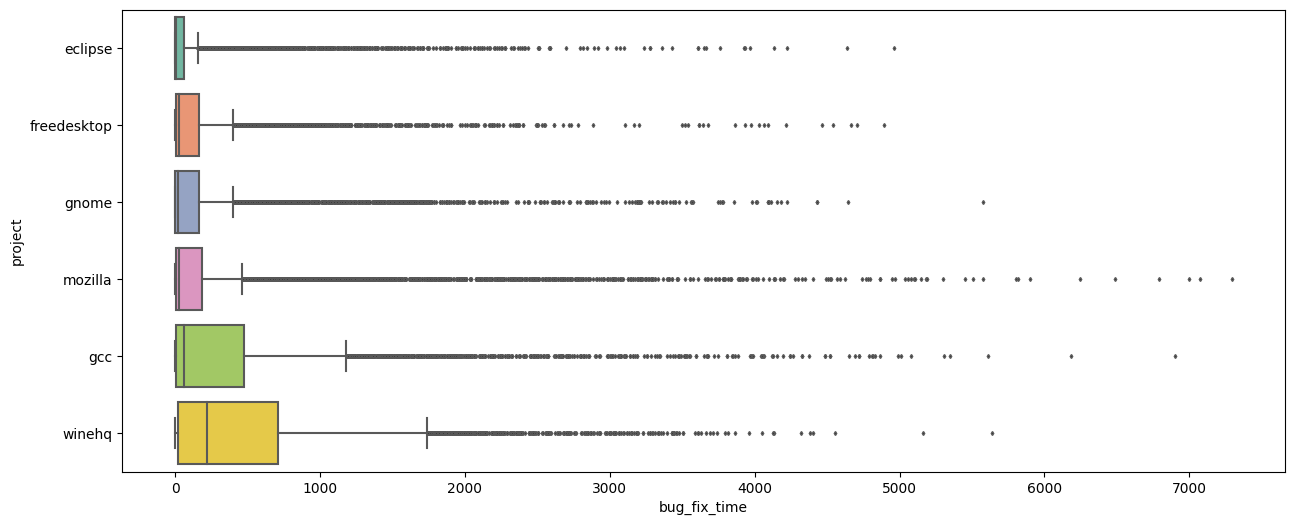

In [22]:
sns.despine(offset=10)
fig, ax = plt.subplots(figsize=(15, 6))
threshold = 8000
df   = bug_reports_all_data.loc[(bug_reports_all_data["bug_fix_time"] < threshold)] 
g = sns.boxplot(data=df, x="bug_fix_time", y="project"
                , palette="Set2", ax=ax, flierprops = dict(markerfacecolor = '.10', markersize = 2))


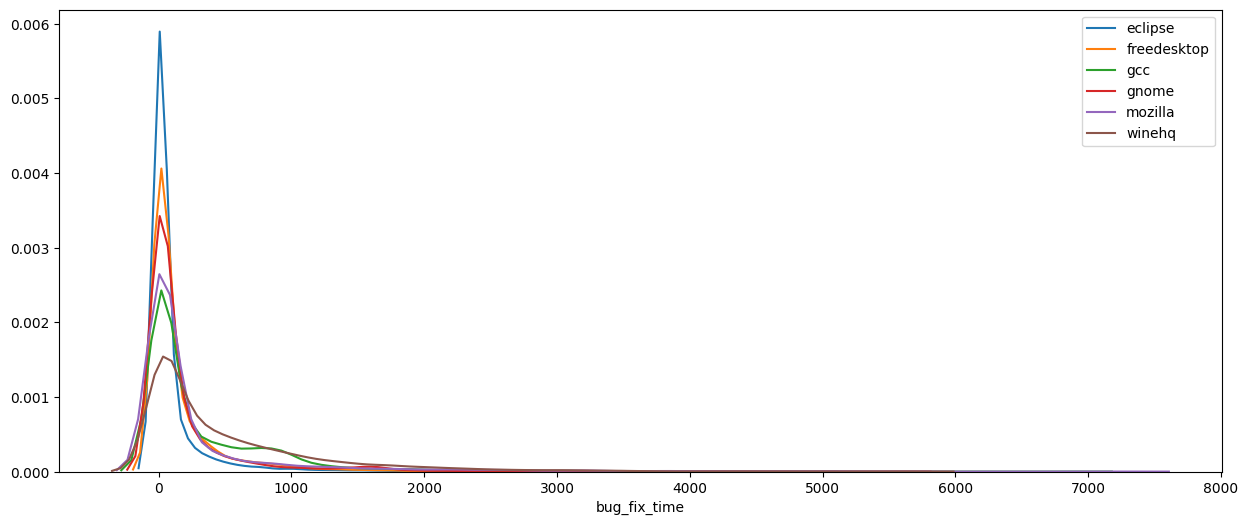

In [23]:
fig, ax   = plt.subplots(figsize=(15, 6))
eclipse   = bug_reports_all_data.loc[(bug_reports_all_data["project"]=="eclipse") & (bug_reports_all_data["bug_fix_time"] < threshold)]["bug_fix_time"] 
sns.distplot(eclipse, hist=False, label="eclipse")
freedesktop = bug_reports_all_data.loc[(bug_reports_all_data["project"]=="freedesktop") & (bug_reports_all_data["bug_fix_time"] < threshold)]["bug_fix_time"] 
sns.distplot(freedesktop, hist=False, label="freedesktop")
gcc = bug_reports_all_data.loc[(bug_reports_all_data["project"]=="gcc") & (bug_reports_all_data["bug_fix_time"] < threshold)]["bug_fix_time"] 
sns.distplot(gcc, hist=False, label="gcc")
gnome = bug_reports_all_data.loc[(bug_reports_all_data["project"]=="gnome") & (bug_reports_all_data["bug_fix_time"] < threshold)]["bug_fix_time"] 
sns.distplot(gnome, hist=False, label="gnome")
mozilla = bug_reports_all_data.loc[(bug_reports_all_data["project"]=="mozilla") & (bug_reports_all_data["bug_fix_time"] < threshold)]["bug_fix_time"] 
sns.distplot(mozilla, hist=False, label="mozilla")
winehq = bug_reports_all_data.loc[(bug_reports_all_data["project"]=="winehq") & (bug_reports_all_data["bug_fix_time"] < threshold)]["bug_fix_time"] 
sns.distplot(winehq, hist=False, label="winehq")

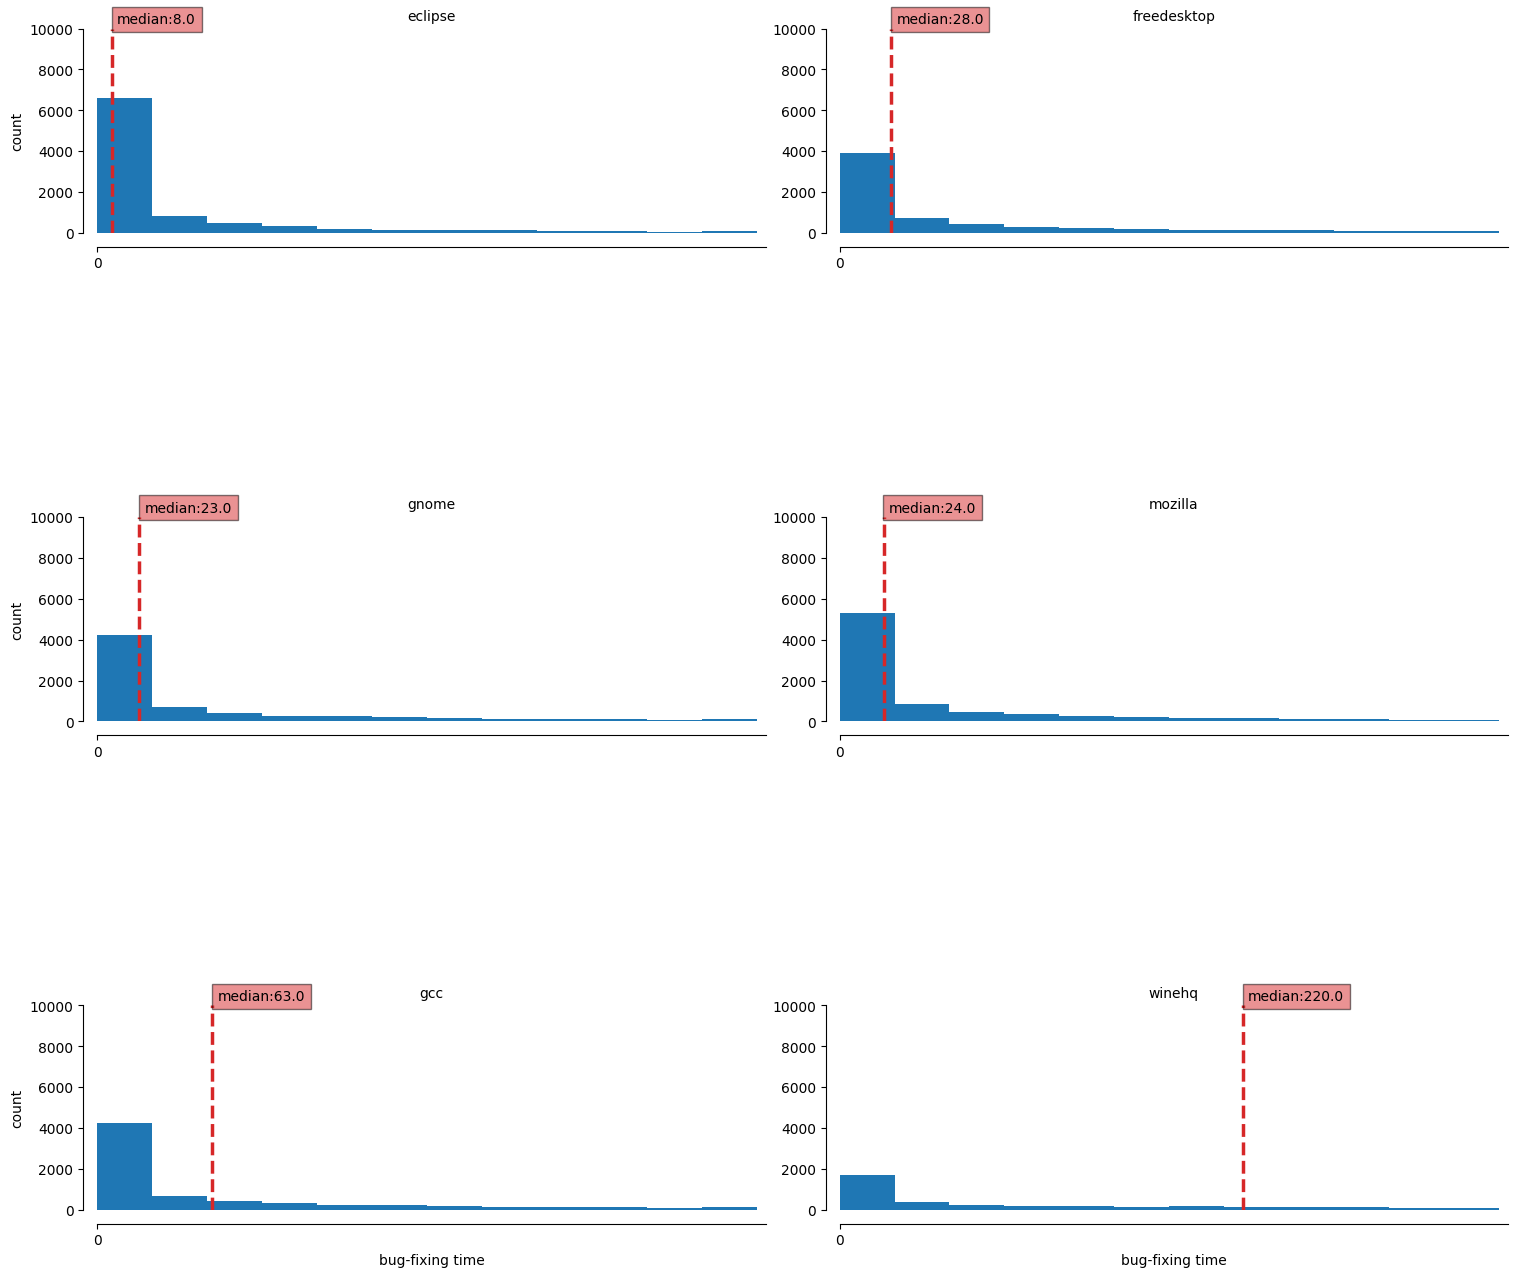

In [76]:
# Long-lived? histogram distribution
def plot_hist(v, color=None):
    m = np.median(v)
    b = np.arange(0, 365, 30)
    sns.despine(offset=10)
    plt.axvline(m, color='tab:red', linestyle='--', linewidth=2.5)
    plt.text(m + 3.0, 10250, f"median:{m}", bbox=dict(facecolor='tab:red', alpha=0.5))
    plt.hist(v, bins=b, color='tab:blue')

# plot histograms
g = sns.FacetGrid(bug_reports_all_data, col="project"
                  , col_order=projects
                  , col_wrap=2, height=5, aspect=1.5)
g = g.map(plot_hist, "bug_fix_time")
g.set_titles("{col_name}")
g.set_axis_labels("bug-fixing time", "count")
g.set(ylim=(0, 10000), xlim=(0, 365), xticks=list(range(0, 365, 365)))


### Step 5. How frequent are long-lived bugs?

In [12]:
def plot_pyramid (data, column, filename):
  
    top_g = data.groupby(column)[column].agg(['count'])
    top_s = top_g.sort_values('count', ascending=False)
    top_n = data.loc[data[column].isin(top_s.index)].groupby(column)['long_lived?'].value_counts(normalize=True).unstack()
    top_n.fillna(0, inplace=True)
    
    top_n.reset_index(inplace=True)
    top_n = top_n.sort_values('long-lived', ascending=True)
    
    print(top_n)
    
    fig, axes = plt.subplots(figsize=(10, 10), ncols=2, sharey=False, gridspec_kw = {'wspace':0, 'hspace':0})

    plt.rcParams["axes.grid.axis"] ="x"
    plt.rcParams["axes.grid"] = True

    sns.despine(offset=0.5)
    sns.barplot(x="long-lived", y=column, color="tab:red", ax=axes[0], data=top_n)
    sns.barplot(x="short-lived", y=column,  color="tab:blue", ax=axes[1], data=top_n)
    
    axes[0].set(xlim=(0, 1))
    axes[0].invert_xaxis()
    axes[0].spines['left'].set_visible(False)
    axes[0].tick_params(axis="x", labelsize=MEDIUM_SIZE+3)
    axes[0].tick_params(axis="y", labelsize=MEDIUM_SIZE+3)
    axes[0].set_ylabel(column.title().replace("_", " ").replace("Category", "Level"), fontsize=MEDIUM_SIZE+2)
    axes[0].set_xlabel("Long-lived", fontsize=MEDIUM_SIZE+3)    
    axes[0].set_xticklabels(['{:,.0%}'.format(x) for x in axes[0].get_xticks()])
    
    axes[1].set(xlim=(0, 1))
    axes[1].set_yticks([])
    axes[1].set(ylabel="")
    axes[1].tick_params(axis="x", labelsize=MEDIUM_SIZE+3)
    axes[1].set_xlabel("Short-lived", fontsize=MEDIUM_SIZE+3)
    axes[1].set_xticklabels(['{:,.0%}'.format(x) for x in axes[1].get_xticks()])
    
    #sns.despine(offset=0.5)
    s = axes[1].twinx()
    labels = [i.get_text() for i in axes[0].get_yticklabels()]
    labels_new = [top_s.loc[top_s.index==i, 'count'].values[0] for i in labels]
    s.set_yticks(axes[0].get_yticks())
    s.set_ylim(axes[0].get_ylim())
    s.set_yticklabels(labels_new)
    s.tick_params(axis="y", labelsize=MEDIUM_SIZE+3)
    
    s.spines['top'].set_visible(False)
    s.spines['bottom'].set_visible(False)
    s.spines['right'].set_visible(False)
    s.spines['left'].set_visible(False)
        
    #fig.suptitle(project, fontsize=BIGGER_SIZE)
    plt.savefig(f"figures/{filename}", format="pdf", dpi=600, bbox_inches='tight')

def plot_bar (data, filename):
    
    top_g = data.groupby("project")["project"].agg(['count'])
    top_s = top_g.sort_values('count', ascending=False)
    top_n = data.loc[data['project'].isin(top_s.index)].groupby('project')['long_lived?'].value_counts(normalize=True).unstack()
    
    plt.figure(figsize=(20,20))
    fig, axis = plt.subplots(figsize=(10, 10)) 
    
    sns.despine(offset=5)
    primary   = top_n.plot(kind='barh', stacked='True',  grid='True', color=["tab:red", "tab:blue"], ax=axis)
    secondary = primary.twinx()
    
    labels = [i.get_text() for i in primary.get_yticklabels()]
    labels_new = [top_s.loc[top_s.index==i, 'count'].values[0] for i in labels]
    
    primary.set(xlim=(0, 1))
    primary.set_xlabel('percentage', fontsize=MEDIUM_SIZE)
    primary.set_ylabel('FLOSS Projects', fontsize=MEDIUM_SIZE) 
    primary.set_title("project", fontsize=BIGGER_SIZE)
    primary.tick_params(axis="y", labelsize=MEDIUM_SIZE)
    primary.tick_params(axis="x", labelsize=MEDIUM_SIZE)
    
    secondary.set_yticks(primary.get_yticks())
    secondary.set_ylim(primary.get_ylim())
    secondary.set_yticklabels(labels_new)
    secondary.tick_params(axis="y", labelsize=MEDIUM_SIZE)
    
    plt.savefig(f"figures/{filename}", format="pdf", dpi=600, bbox_inches='tight')


long_lived?      project  long-lived  short-lived
0                eclipse    0.076615     0.923385
1            freedesktop    0.136411     0.863589
3                  gnome    0.144162     0.855838
4                mozilla    0.180636     0.819364
2                    gcc    0.291558     0.708442
5                 winehq    0.406883     0.593117


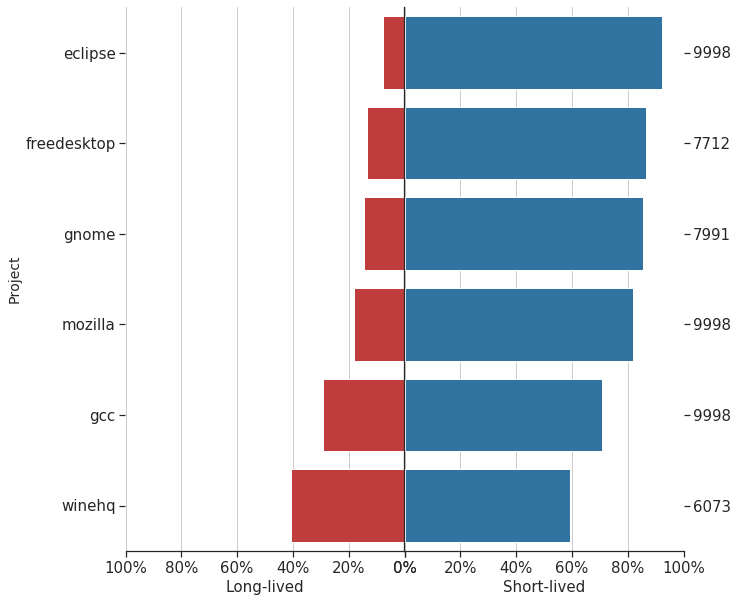

In [20]:
plot_pyramid(bug_reports_all_data, 'project', 'rq2-all-percentage-of-long-lived-bugs.pdf')

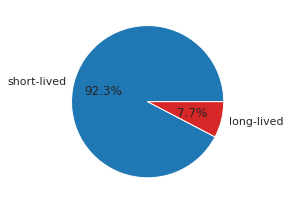

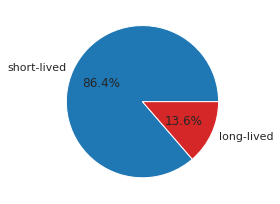

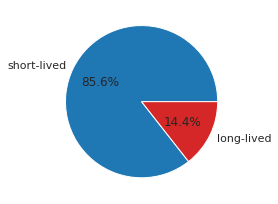

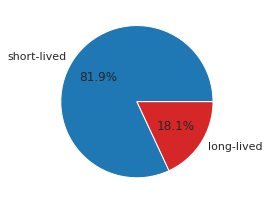

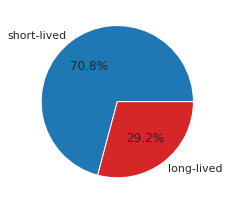

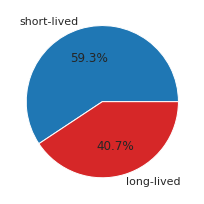

In [14]:

for project in projects:
    # group data by project
    counts_by_project  = bug_reports_all_data.loc[bug_reports_all_data['project']==project]['long_lived?'].value_counts()

    # plot pie charts
    sns.set_context("paper")
    sns.set(style="ticks", color_codes=True)
    fig = plt.figure(figsize=(3.5,3.5))
    plt.pie(counts_by_project, autopct='%1.1f%%', labels=counts_by_project.index, colors=['tab:blue', 'tab:red'])
    #plt.title(project.title())
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig(f"figures/rq2-{project}-percentage-of-long-lived-bugs.pdf", format="pdf", dpi=fig.dpi, bbox_inches='tight', pad_inches=0)
    